# Практическая работа №1

### Самые популярные блогеры в сети Instagram

<span style="color:#b405fa">**Цель практической работы**</span>
+ Проанализировать датасет выявить ключевые связи

<span style="color:blue">***Задачи***</span>
- Ознакомится с датасетом (посмотреть общую статистику, особенности и т.д.)
- Проанализировать датасет (перекодировка значений, выявление аномалий, выявить среднее, моду, дисперсию, построить графики и т.д.)
- Сделать ключевые выводы по анализу датасета

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import math as m

In [2]:
instagram = pd.read_csv('Downloads/instagram_global_top_1000.csv') #читаем датасет

<span style="color:#3942c6">***Изучаем датасет***</span>

In [3]:
print(len(instagram)) #выводим количество строк сета

1000


In [4]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               1000 non-null   object 
 1   Rank                  1000 non-null   int64  
 2   Account               1000 non-null   object 
 3   Title                 983 non-null    object 
 4   Link                  1000 non-null   object 
 5   Category              909 non-null    object 
 6   Followers             1000 non-null   float64
 7   Audience Country      993 non-null    object 
 8   Authentic engagement  1000 non-null   float64
 9   Engagement avg        1000 non-null   float64
 10  Scraped               1000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [5]:
instagram.describe() #общая статистика

,Rank,Followers,Authentic engagement,Engagement avg
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07


In [6]:
instagram

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0,318200.0,2022-02-07 16:50:24.798803
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000.0,Germany,146500.0,210200.0,2022-02-07 16:50:24.798803
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803


In [7]:
instagram.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803


In [8]:
instagram.columns

Index(['Country', 'Rank', 'Account', 'Title', 'Link', 'Category', 'Followers',
       'Audience Country', 'Authentic engagement', 'Engagement avg',
       'Scraped'],
      dtype='object')

In [9]:
instagram.shape

(1000, 11)

In [10]:
instagram['Account'] #смотрим данные по столбцу имя блогера

0          cristiano
1        kyliejenner
2           leomessi
3      kendalljenner
4        selenagomez
           ...      
995    senoritasaeva
996      manuelneuer
997        sahilkhan
998      mohanshakti
999         eduincaz
Name: Account, Length: 1000, dtype: object

In [11]:
instagram['Audience Country'].unique() #уникальные данные по столбцу страны

array(['India', 'United States', 'Argentina', 'Brazil', 'Indonesia',
       'Iran', nan, 'France', 'Mexico', 'Russia', 'South Korea', 'Egypt',
       'Turkey', 'Spain', 'Italy', 'China', 'Colombia', 'United Kingdom',
       'Poland', 'Nigeria', 'Thailand', 'Philippines', 'Saudi Arabia',
       'Morocco', 'United Arab Emirates', 'Iraq', 'Germany', 'Algeria',
       'Syria', 'Kazakhstan', 'Japan', 'Chile'], dtype=object)

In [12]:
instagram.iloc[333] #выборочные данные по строке 333

Country                                                    All
Rank                                                       334
Account                                            _agentgirl_
Title                                            НАСТЯ ИВЛЕЕВА
Link                    https://www.instagram.com/_agentgirl_/
Category                                                 Shows
Followers                                           19200000.0
Audience Country                                        Russia
Authentic engagement                                  449400.0
Engagement avg                                        543400.0
Scraped                             2022-02-07 16:50:24.798803
Name: 333, dtype: object

In [13]:
instagram[instagram['Category'] =='Music|Lifestyle'] 
#сколько данных о категории Music|Lifestyle, фильтрация

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803
45,All,46,eunwo.o_c,차은우,https://www.instagram.com/eunwo.o_c/,Music|Lifestyle,26500000.0,Indonesia,3700000.0,4600000.0,2022-02-07 16:50:24.798803
217,All,218,aron.piper,ARON🌜🌞,https://www.instagram.com/aron.piper/,Music|Lifestyle,14100000.0,Brazil,648100.0,1200000.0,2022-02-07 16:50:24.798803
295,All,296,luisasonza,LUÍSA SONZA,https://www.instagram.com/luisasonza/,Music|Lifestyle,27200000.0,Brazil,289400.0,457000.0,2022-02-07 16:50:24.798803
503,All,504,lizzobeeating,Lizzo,https://www.instagram.com/lizzobeeating/,Music|Lifestyle,12000000.0,United States,371800.0,519800.0,2022-02-07 16:50:24.798803
513,All,514,polo.capalot,Polo.G🐐,https://www.instagram.com/polo.capalot/,Music|Lifestyle,9900000.0,United States,378400.0,622400.0,2022-02-07 16:50:24.798803
629,All,630,xsqueezie,NaN,https://www.instagram.com/xsqueezie/,Music|Lifestyle,7600000.0,France,507100.0,593000.0,2022-02-07 16:50:24.798803
732,All,733,sarwendah29,Sarwendah29,https://www.instagram.com/sarwendah29/,Music|Lifestyle,30300000.0,Indonesia,99700.0,118200.0,2022-02-07 16:50:24.798803
896,All,897,beberexha,Bebe Rexha,https://www.instagram.com/beberexha/,Music|Lifestyle,10800000.0,India,170800.0,252100.0,2022-02-07 16:50:24.798803
917,All,918,ayutingting92,Ayu Tingting,https://www.instagram.com/ayutingting92/,Music|Lifestyle,50600000.0,Indonesia,38600.0,52000.0,2022-02-07 16:50:24.798803


In [14]:
instagram[instagram['Audience Country'] =='Russia'] 
#сколько блогеров из России

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
48,All,49,ester_exposito,Ester 🌙,https://www.instagram.com/ester_exposito/,Cinema|Actors/actresses,29000000.0,Russia,2500000.0,3700000.0,2022-02-07 16:50:24.798803
97,All,98,madelame,Madelaine Petsch,https://www.instagram.com/madelame/,Cinema|Actors/actresses,25400000.0,Russia,1400000.0,1900000.0,2022-02-07 16:50:24.798803
210,All,211,samoylovaoxana,Samoylova Oxana,https://www.instagram.com/samoylovaoxana/,Family|Lifestyle,15700000.0,Russia,877300.0,1200000.0,2022-02-07 16:50:24.798803
213,All,214,gusein.gasanov,ГУСЕЙН ГАСАНОВ,https://www.instagram.com/gusein.gasanov/,Shows,20900000.0,Russia,580500.0,867700.0,2022-02-07 16:50:24.798803
291,All,292,thebursin,Kerem Bürsin,https://www.instagram.com/thebursin/,Cinema|Actors/actresses,10100000.0,Russia,988600.0,1300000.0,2022-02-07 16:50:24.798803
305,All,306,realbarbarapalvin,Barbara Palvin,https://www.instagram.com/realbarbarapalvin/,Modeling|Fashion,17300000.0,Russia,513100.0,692800.0,2022-02-07 16:50:24.798803
328,All,329,khabib_nurmagomedov,Хабиб Нурмагомедов,https://www.instagram.com/khabib_nurmagomedov/,Fitness|Gym,32700000.0,Russia,236300.0,331600.0,2022-02-07 16:50:24.798803
333,All,334,_agentgirl_,НАСТЯ ИВЛЕЕВА,https://www.instagram.com/_agentgirl_/,Shows,19200000.0,Russia,449400.0,543400.0,2022-02-07 16:50:24.798803
354,All,355,ler_chek,Валерия Чекалина,https://www.instagram.com/ler_chek/,Lifestyle|Beauty,10700000.0,Russia,699200.0,913800.0,2022-02-07 16:50:24.798803
384,All,385,goar_avetisyan,Goar Avetisyan,https://www.instagram.com/goar_avetisyan/,Beauty,11500000.0,Russia,527000.0,731500.0,2022-02-07 16:50:24.798803


In [15]:
instagram[instagram['Title'].isna()].shape #пропущенные значения

(17, 11)

In [16]:
instagram ['Followers'].sort_values(ascending=False)

28     469600000.0
0      400100000.0
1      308800000.0
2      306300000.0
4      295800000.0
          ...     
836      3200000.0
971      3200000.0
835      3200000.0
808      3100000.0
747      2800000.0
Name: Followers, Length: 1000, dtype: float64

<span style="color:#3942c6">***Переводим основные значения в млн.чел и добавляем колонки Followers_Mln, Authentic engagement_Mln, Engagement avg_Mln для удобства использования в дальнейшем анализе***</span>


In [17]:
instagram['Followers_Mln'] = (instagram ['Followers'])/100000
instagram['Authentic engagement_Mln'] = (instagram ['Authentic engagement'])/100000
instagram['Engagement avg_Mln'] = (instagram ['Engagement avg'])/100000


In [18]:
instagram.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.0,95.0
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.0,101.0
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.0,65.0
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,2178.0,34.0,54.0
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.0,36.0


In [19]:
instagram.sort_values(by=['Followers', 'Authentic engagement'], ascending=[True,True]) 
#сортировка по подписчикам и вовлечению

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln
747,All,748,yooncy1,윤찬영 Yoon chanyoung,https://www.instagram.com/yooncy1/,NaN,2800000.0,South Korea,1100000.0,1300000.0,2022-02-07 16:50:24.798803,28.0,11.000,13.000
808,All,809,for_everyoung10,장원영 WONYOUNG,https://www.instagram.com/for_everyoung10/,NaN,3100000.0,Indonesia,801100.0,1000000.0,2022-02-07 16:50:24.798803,31.0,8.011,10.000
971,All,972,nozeworld,no:ze | 노제,https://www.instagram.com/nozeworld/,NaN,3200000.0,South Korea,637000.0,779700.0,2022-02-07 16:50:24.798803,32.0,6.370,7.797
836,All,837,sound_of_coups,COUPS,https://www.instagram.com/sound_of_coups/,NaN,3200000.0,Indonesia,727300.0,932900.0,2022-02-07 16:50:24.798803,32.0,7.273,9.329
835,All,836,wilbursoot,Wilbur Soot,https://www.instagram.com/wilbursoot/,Music,3200000.0,United States,733800.0,942600.0,2022-02-07 16:50:24.798803,32.0,7.338,9.426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.000,36.000
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.000,65.000
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.000,101.000
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.000,95.000


### Исходя из таблицы можно сделать о том, что количество подписчиков не всегда означает высокое вовлечение в аккаунт блогера

In [20]:
def get_followers_cat(Followers):
    if Followers < 4000000:
        return 'min'
    elif Followers < 200000000:
        return 'middle'
    elif Followers < 400110000:
        return 'max'                        
    #создаю категории для столбца подписчики, исходя из их количества

In [21]:
instagram['Followers Category'] = instagram ['Followers'].apply(get_followers_cat) 
#добавляю столбец с категорией подписчиков

In [22]:
instagram.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln,Followers Category
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.0,95.0,max
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.0,101.0,max
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.0,65.0,max
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,2178.0,34.0,54.0,max
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.0,36.0,max


In [23]:
instagram['Followers Category'] = pd.Categorical(instagram['Followers Category']) 
#перекодировка колонки в категориальную переменную

In [24]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Country                   1000 non-null   object  
 1   Rank                      1000 non-null   int64   
 2   Account                   1000 non-null   object  
 3   Title                     983 non-null    object  
 4   Link                      1000 non-null   object  
 5   Category                  909 non-null    object  
 6   Followers                 1000 non-null   float64 
 7   Audience Country          993 non-null    object  
 8   Authentic engagement      1000 non-null   float64 
 9   Engagement avg            1000 non-null   float64 
 10  Scraped                   1000 non-null   object  
 11  Followers_Mln             1000 non-null   float64 
 12  Authentic engagement_Mln  1000 non-null   float64 
 13  Engagement avg_Mln        1000 non-null   float64

In [25]:
instagram['Followers Category'].cat.codes

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Length: 1000, dtype: int8

In [26]:
instagram['Followers Category'].cat.categories

Index(['max', 'middle', 'min'], dtype='object')

In [27]:
instagram['Followers Category'].value_counts() 
#считаем, сколько значений получилось по каждой категории

middle    969
min        18
max        12
Name: Followers Category, dtype: int64

### Больше всего блогеров со среднем количеством подписчиков. 969

In [28]:
instagram['Followers Category'].value_counts(dropna=False) 
#смотрим, сколько строк без данных

middle    969
min        18
max        12
NaN         1
Name: Followers Category, dtype: int64

In [29]:
instagram.groupby('Audience Country')['Followers_Mln'].sum()
#в каких странах проживают самые влиятельные блогеры 

Audience Country
Algeria                    82.0
Argentina                6365.0
Brazil                  35886.0
Chile                     131.0
China                     270.0
Colombia                 1778.0
Egypt                    1388.0
France                   1428.0
Germany                   922.0
India                   49360.0
Indonesia               22015.0
Iran                     2947.0
Iraq                      652.0
Italy                    2587.0
Japan                     144.0
Kazakhstan                140.0
Mexico                   8295.0
Morocco                   205.0
Nigeria                   600.0
Philippines               879.0
Poland                    242.0
Russia                   4074.0
Saudi Arabia              248.0
South Korea              1424.0
Spain                    7868.0
Syria                      82.0
Thailand                  445.0
Turkey                   2594.0
United Arab Emirates      137.0
United Kingdom           2831.0
United States          

### в США и Индии проживают самые влиятельные блогеры

In [30]:
len(list(instagram.groupby('Followers')))

399

In [31]:
instagram['Audience Country'].value_counts() 
#в каких странах живут блогеры, сколько блогеров приходится на 1 страну

United States           283
Brazil                  161
India                   143
Indonesia               130
Mexico                   50
Spain                    34
Russia                   30
Argentina                24
Iran                     17
United Kingdom           17
Turkey                   16
Italy                    15
South Korea              13
Colombia                  9
Philippines               7
France                    6
Egypt                     6
Germany                   5
Nigeria                   4
Thailand                  4
Iraq                      4
Morocco                   3
Japan                     2
Saudi Arabia              2
Kazakhstan                2
Syria                     1
China                     1
Algeria                   1
United Arab Emirates      1
Poland                    1
Chile                     1
Name: Audience Country, dtype: int64

<AxesSubplot:>

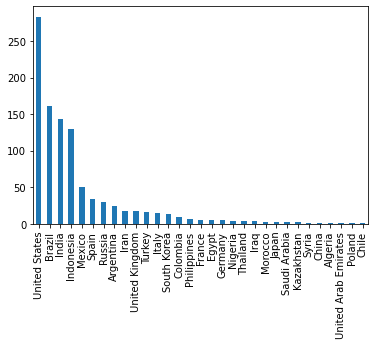

In [32]:
instagram['Audience Country'].value_counts().plot(kind='bar') 
#строим график по количеству блогеров в странах от большего к меньшему

<AxesSubplot:xlabel='Audience Country'>

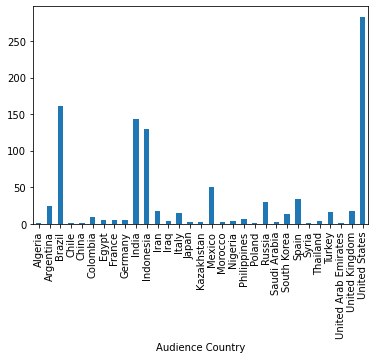

In [33]:
instagram.groupby('Audience Country').size().plot(kind='bar')
#строим график по количеству блогеров в странах в алфавитном порядке

In [34]:
instagram.groupby('Audience Country')['Followers Category'].value_counts().unstack()\
#все страны в разрезе количества блогеров

,max,middle,min
Audience Country,,,
Algeria,0,1,0
Argentina,1,22,1
Brazil,0,161,0
Chile,0,1,0
China,0,1,0
Colombia,0,9,0
Egypt,0,6,0
France,0,5,1
Germany,0,5,0


### в США,Бразилии и Индии проживает больше всего блогеров. 
Россия на 7 месте

Text(0.5, 0.98, 'Все страны в разрезе количества блогеров и подписчиков')

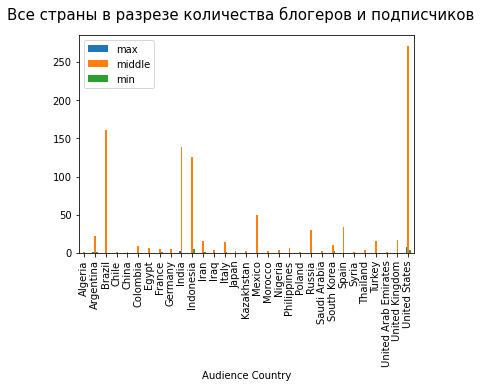

In [35]:
instagram.groupby('Audience Country')['Followers Category'].value_counts().unstack().plot(kind='bar')
plt.suptitle('Все страны в разрезе количества блогеров и подписчиков', fontsize=15)


Text(0.5, 0.98, 'Все страны в разрезе количества блогеров и подписчиков')

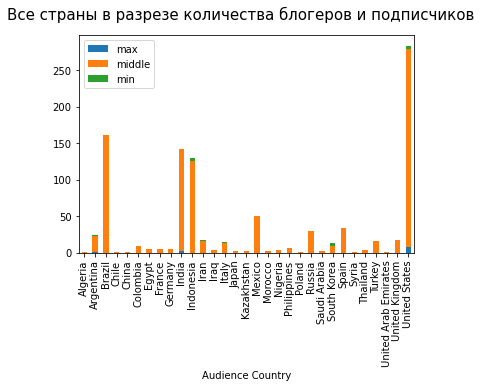

In [36]:
instagram.groupby('Audience Country')['Followers Category'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.suptitle('Все страны в разрезе количества блогеров и подписчиков', fontsize=15)

<span style="color:#3942c6">***Определяем среднее значение, медиану, моду, размах по подписчикам***</span>


In [37]:
instagram['Followers_Mln'].mean() 
#среднее значение по подписчикам среди всех блогеров 

248.361

In [38]:
followers_sorted = instagram['Followers_Mln'].sort_values().reset_index(drop=True)
print(len(followers_sorted))
ind_1, ind_2 = int(len(followers_sorted) / 2), int(len(followers_sorted)/2 + 1)
print(ind_1,ind_2)
print((followers_sorted[ind_1] + followers_sorted [ind_2]) / 2)

1000
500 501
144.0


In [39]:
instagram['Followers_Mln'].median() 
#медиана по подписчикам среди всех блогеров

144.0

In [40]:
instagram['Followers_Mln'].value_counts()

78.0     14
99.0     12
67.0     10
93.0     10
133.0    10
         ..
331.0     1
485.0     1
519.0     1
252.0     1
62.0      1
Name: Followers_Mln, Length: 399, dtype: int64

In [41]:
instagram['Followers_Mln'].mode()
#мода по подписчикам среди всех блогеров

0    78.0
Name: Followers_Mln, dtype: float64

<AxesSubplot:>

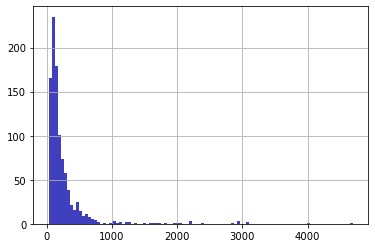

In [42]:
instagram['Followers_Mln'].hist(bins=100, color='#4040bf')

### Большинство блогеров имеет до 10 млн подписчиков 

In [43]:
instagram.describe()

,Rank,Followers,Authentic engagement,Engagement avg,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,500.500000,2.483610e+07,6.491228e+05,8.653886e+05,248.361000,6.491228,8.653886
std,288.819436,3.872143e+07,1.098804e+06,1.267515e+06,387.214346,10.988035,12.675152
min,1.000000,2.800000e+06,0.000000e+00,5.200000e+04,28.000000,0.000000,0.520000
25%,250.750000,9.000000e+06,2.091000e+05,3.086000e+05,90.000000,2.091000,3.086000
50%,500.500000,1.440000e+07,3.637000e+05,5.239000e+05,144.000000,3.637000,5.239000
75%,750.250000,2.565000e+07,6.832500e+05,9.508000e+05,256.500000,6.832500,9.508000
max,1000.000000,4.696000e+08,1.340000e+07,1.340000e+07,4696.000000,134.000000,134.000000


In [44]:
instagram.to_pickle('Downloads/Instagram.pkl')

In [45]:
instagram['Followers_Mln'].max() - instagram['Followers_Mln'].min() #считаем размах по подписчикам

4668.0

In [46]:
np.percentile(instagram['Followers_Mln'], 25) 
#ищем перцентиль 25 для подписчиков

90.0

In [47]:
np.percentile(instagram['Followers_Mln'], 75) - np.percentile(instagram['Followers'], 25) 
#считаем интеквартильный размах

-8999743.5

<span style="color:#3942c6">***Дисперсия, среднеквадратическое отклонение***</span>

In [48]:
print(instagram['Followers_Mln'].var()) #дисперсия для выборки
print(instagram['Followers_Mln'].std()) #среднеквадрат отклонение для выборки

149934.94962862856
387.21434584559046


In [49]:
print(instagram['Followers_Mln'].var(ddof=0)) #дисперсия для ген совокупности
print(instagram['Followers_Mln'].std(ddof=0)) #среднеквадрат отклонение для ген совокупности

149785.01467899993
387.02069024665843


In [50]:
def range_values(x):
    return x.max() - x.min()

instagram.pivot_table(index='Audience Country',
                     values=['Followers_Mln', 'Authentic engagement_Mln'],
                     aggfunc=['var', 'std',range_values])

var                 \
                     Authentic engagement_Mln  Followers_Mln   
Audience Country                                               
Argentina                           89.410239  364437.302536   
Brazil                              19.967159   47029.782531   
Colombia                             1.629015   23780.277778   
Egypt                               14.650170   15297.066667   
France                              30.152661   65548.400000   
Germany                              0.878938   13445.300000   
India                               72.166372  355415.046686   
Indonesia                          136.219047   24824.817233   
Iran                                83.358425   28340.992647   
Iraq                                 1.819869   12124.666667   
Italy                                5.509652   29275.695238   
Japan                                1.643485    1152.000000   
Kazakhstan                           0.918012      98.000000   
Mexico                              25.056663   21556.622449   
Morocco                              3.833209     174.333333   
Nigeria                              0.845633    3320.666667   
Philippines                          4.949592    1350.619048   
Russia                              22.109384    5313.337931   
Saudi Arabia                         3.160098    1058.000000   
South Korea                         66.512847    5833.602564   
Spain                                5.359639   41018.188948   
Thailand                             2.026407    1348.250000   
Turkey                              18.115582   10182.250000   
United Kingdom                       1.756655   24496.264706   
United States                      186.655430  246390.756810   
Algeria                                   NaN            NaN   
Chile                                     NaN            NaN   
China                                     NaN            NaN   
Poland                                    NaN            NaN   
Syria                                     NaN            NaN   
United Arab Emirates                      NaN            NaN   

                                          std                \
                     Authentic engagement_Mln Followers_Mln   
Audience Country                                              
Argentina                            9.455699    603.686427   
Brazil                               4.468463    216.863511   
Colombia                             1.276329    154.208553   
Egypt                                3.827554    123.681311   
France                               5.491144    256.024218   
Germany                              0.937517    115.953870   
India                                8.495079    596.166962   
Indonesia                           11.671292    157.558933   
Iran                                 9.130084    168.347832   
Iraq                                 1.349025    110.112064   
Italy                                2.347265    171.101418   
Japan                                1.281985     33.941125   
Kazakhstan                           0.958130      9.899495   
Mexico                               5.005663    146.821737   
Morocco                              1.957858     13.203535   
Nigeria                              0.919583     57.625226   
Philippines                          2.224768     36.750769   
Russia                               4.702062     72.892647   
Saudi Arabia                         1.777666     32.526912   
South Korea                          8.155541     76.378024   
Spain                                2.315089    202.529477   
Thailand                             1.423519     36.718524   
Turkey                               4.256240    100.907136   
United Kingdom                       1.325389    156.512826   
United States                       13.662190    496.377635   
Algeria                                   NaN           NaN   
Chile                                 

In [51]:
import scipy.stats 

<AxesSubplot:>

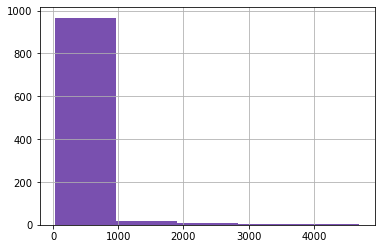

In [52]:
instagram['Followers_Mln'].hist(bins=5, color='#7950af')

In [53]:
instagram['z-score']=scipy.stats.zscore(instagram['Followers_Mln'])
instagram.head() #Z-оценка

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln,Followers Category,z-score
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.0,95.0,max,9.696223
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.0,101.0,max,7.337176
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.0,65.0,max,7.272580
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,2178.0,34.0,54.0,max,4.985881
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.0,36.0,max,7.001277


<span style="color:#3942c6">***Z-оценка***</span>

<AxesSubplot:>

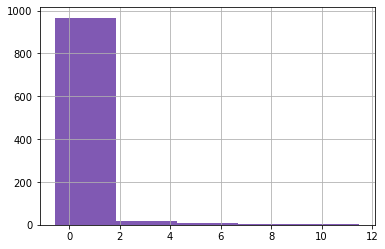

In [54]:
instagram['z-score'].hist(bins=5, color='#8059b3')

In [55]:
instagram[instagram['z-score'] >5] #блогеры с z-оценкой больше 5

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln,Followers Category,z-score
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.000,95.000,max,9.696223
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.000,101.000,max,7.337176
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.000,65.000,max,7.272580
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.000,36.000,max,7.001277
6,All,7,kimkardashian,Kim Kardashian West,https://www.instagram.com/kimkardashian/,Fashion|Beauty,284900000.0,United States,2200000.0,3300000.0,2022-02-07 16:50:24.798803,2849.0,22.000,33.000,max,6.719638
7,All,8,beyonce,Beyoncé,https://www.instagram.com/beyonce/,Music|Fashion,237200000.0,United States,2500000.0,3600000.0,2022-02-07 16:50:24.798803,2372.0,25.000,36.000,max,5.487146
8,All,9,arianagrande,Ariana Grande,https://www.instagram.com/arianagrande/,Music,294100000.0,United States,1700000.0,2400000.0,2022-02-07 16:50:24.798803,2941.0,17.000,24.000,max,6.957352
17,All,18,khloekardashian,Khloé Kardashian,https://www.instagram.com/khloekardashian/,Clothing|Outfits|Lifestyle,219400000.0,United States,1500000.0,1900000.0,2022-02-07 16:50:24.798803,2194.0,15.000,19.000,max,5.027222
19,All,20,justinbieber,Justin Bieber,https://www.instagram.com/justinbieber/,Music,219800000.0,India,1200000.0,1800000.0,2022-02-07 16:50:24.798803,2198.0,12.000,18.000,max,5.037558
27,All,28,therock,therock,https://www.instagram.com/therock/,Cinema|Actors/actresses|Fitness|Gym,295800000.0,India,741000.0,994800.0,2022-02-07 16:50:24.798803,2958.0,7.410,9.948,max,7.001277


In [56]:
instagram.groupby('Audience Country')['z-score'].mean() 
#смотрим z-оценку по странам, у блогеров из США больше всего подписчиков 

Audience Country
Algeria                -0.429850
Argentina               0.043531
Brazil                 -0.065802
Chile                  -0.303242
China                   0.055912
Colombia               -0.131273
Egypt                  -0.043997
France                 -0.026771
Germany                -0.165265
India                   0.250152
Indonesia              -0.204162
Iran                   -0.193809
Iraq                   -0.220559
Italy                  -0.196099
Japan                  -0.455689
Kazakhstan             -0.460856
Mexico                 -0.213066
Morocco                -0.465163
Nigeria                -0.254149
Philippines            -0.317269
Poland                 -0.016436
Russia                 -0.290840
Saudi Arabia           -0.321329
South Korea            -0.358695
Spain                  -0.043794
Syria                  -0.429850
Thailand               -0.354273
Turkey                 -0.222820
United Arab Emirates   -0.287739
United Kingdom         -0.

<span style="color:#3942c6">***Выбросы***</span>

In [57]:
q3 = np.percentile(instagram['Followers_Mln'], 75, interpolation = 'midpoint')
q1 = np.percentile(instagram['Followers_Mln'], 25, interpolation = 'midpoint')
print(q3, q1)

257.0 90.0


In [58]:
iqr = q3 - q1
print(iqr)
print("Old Shape: ", instagram.shape)

167.0
Old Shape:  (1000, 16)


In [59]:
iqr_threshold_bottom = q1 - 1.5 * iqr
igr_threshold_top = q3 + 1.5 * iqr
print(iqr_threshold_bottom, igr_threshold_top)

-160.5 507.5


In [60]:
instagram[instagram['Followers_Mln']>igr_threshold_top].shape

(84, 16)

In [61]:
instagram[instagram['Followers_Mln'] > igr_threshold_top]['Audience Country'].value_counts()
#больше всего выбросов в США, Индии и Бразилии (т.е. в самых популярных странах)

United States     34
India             20
Brazil            12
Indonesia          7
Mexico             2
Spain              2
Italy              2
United Kingdom     2
Argentina          1
Iran               1
France             1
Name: Audience Country, dtype: int64

In [62]:
mean = instagram ['Followers_Mln'].mean()
std = instagram ['Followers_Mln'].std()
std_threshold_bottom = mean - 2.5 * std
std_threshold_top = mean + 2.5 * std
print(std_threshold_bottom, std_threshold_top)

-719.6748646139762 1216.396864613976


In [63]:
instagram[instagram['Followers_Mln'] > std_threshold_top].shape

(25, 16)

In [64]:
iqr_no_outliers = instagram[instagram['Followers_Mln'] <= igr_threshold_top]
std_no_outliers = instagram[instagram['Followers_Mln'] <= std_threshold_top]

In [65]:
print(instagram['Followers_Mln'].mean())
print(iqr_no_outliers ['Followers_Mln'].mean())
print(std_no_outliers['Followers_Mln'].mean())

248.361
165.22816593886463
196.63589743589745


In [66]:
print(instagram['Followers_Mln'].median())
print(iqr_no_outliers ['Followers_Mln'].median())
print(std_no_outliers['Followers_Mln'].median())

144.0
133.0
139.0


In [67]:
(instagram['Followers_Mln'] < q1-1.5*iqr ) | (instagram['Followers_Mln'] > q3+1.5*iqr)

0       True
1       True
2       True
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Followers_Mln, Length: 1000, dtype: bool

<span style="color:#3942c6">***Построение коробчатой диаграммы для обнаружения выбросов***</span>

<AxesSubplot:>

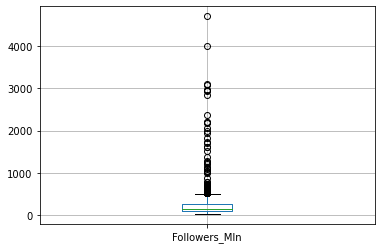

In [68]:
instagram.boxplot(column=['Followers_Mln'])
#отражаем выбросы на графике, видим, что есть выбросы более 4000

In [69]:
print(q3,q1,iqr)

257.0 90.0 167.0


<span style="color:#3942c6">***Убираем выбросы, для этого создаем доп. таблицу***</span>

In [70]:

# Upper bound
upper = np.where(instagram['Followers_Mln'] >= (q3+2.5*iqr))
# Lower bound
lower = np.where(instagram['Followers_Mln'] <= (q1-2.5*iqr))

print(upper,lower)
    
''' Removing the Outliers '''
insta = instagram.copy()
insta.drop(upper[0], inplace = True)
insta.drop(lower[0], inplace = True)

 
print("New Shape: ", insta.shape)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
        16,  17,  19,  22,  23,  24,  27,  28,  30,  32,  38,  39,  42,
        46,  49,  52,  53,  64,  67,  70,  76,  77,  83,  86,  96, 109,
       111, 115, 117, 127, 167, 200, 372, 691]),) (array([], dtype=int64),)
New Shape:  (953, 16)


<span style="color:#3942c6">***Сравниваем: графики с выбросами (1) и без выбросов (2)***</span>

<AxesSubplot:>

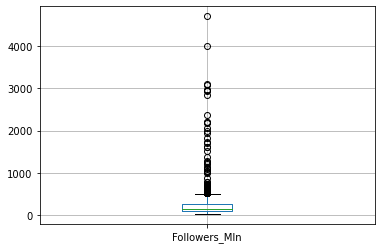

In [71]:
instagram.boxplot(column=['Followers_Mln'])

<AxesSubplot:>

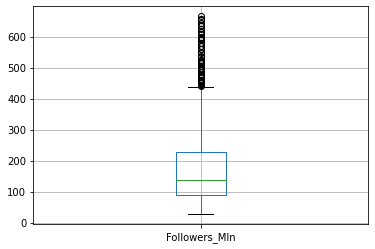

In [72]:
insta.boxplot(column=['Followers_Mln'])

<span style="color:#3942c6">***Сравниваем: таблицы с выбросами (1) и без выбросов (2)***</span>

In [73]:
instagram.head()

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln,Followers Category,z-score
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,4001.0,78.0,95.0,max,9.696223
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,3088.0,62.0,101.0,max,7.337176
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,3063.0,48.0,65.0,max,7.272580
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,2178.0,34.0,54.0,max,4.985881
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,2958.0,27.0,36.0,max,7.001277


In [74]:
insta.head() #таблица без выбросов

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Followers_Mln,Authentic engagement_Mln,Engagement avg_Mln,Followers Category,z-score
12,All,13,jennierubyjane,J,https://www.instagram.com/jennierubyjane/,Music,62300000.0,Indonesia,6400000.0,7600000.0,2022-02-07 16:50:24.798803,623.0,64.0,76.0,middle,0.968008
13,All,14,tomholland2013,Tom Holland,https://www.instagram.com/tomholland2013/,Cinema|Actors/actresses,60900000.0,United States,5900000.0,7200000.0,2022-02-07 16:50:24.798803,609.0,59.0,72.0,middle,0.931834
15,All,16,abcdefghi__lmnopqrstuvwxyz,Jungkook,https://www.instagram.com/abcdefghi__lmnopqrst...,NaN,32100000.0,United States,13400000.0,13400000.0,2022-02-07 16:50:24.798803,321.0,134.0,134.0,middle,0.187688
18,All,19,sooyaaa__,JISOO🤍,https://www.instagram.com/sooyaaa__/,Music|Beauty,56100000.0,Indonesia,6300000.0,7200000.0,2022-02-07 16:50:24.798803,561.0,63.0,72.0,middle,0.807810
20,All,21,thv,V,https://www.instagram.com/thv/,NaN,34100000.0,NaN,10400000.0,10400000.0,2022-02-07 16:50:24.798803,341.0,104.0,104.0,middle,0.239364


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import math as m

# figure size in inches
rcParams['figure.figsize'] = 14,10


<AxesSubplot:xlabel='Followers_Mln', ylabel='Authentic engagement_Mln'>

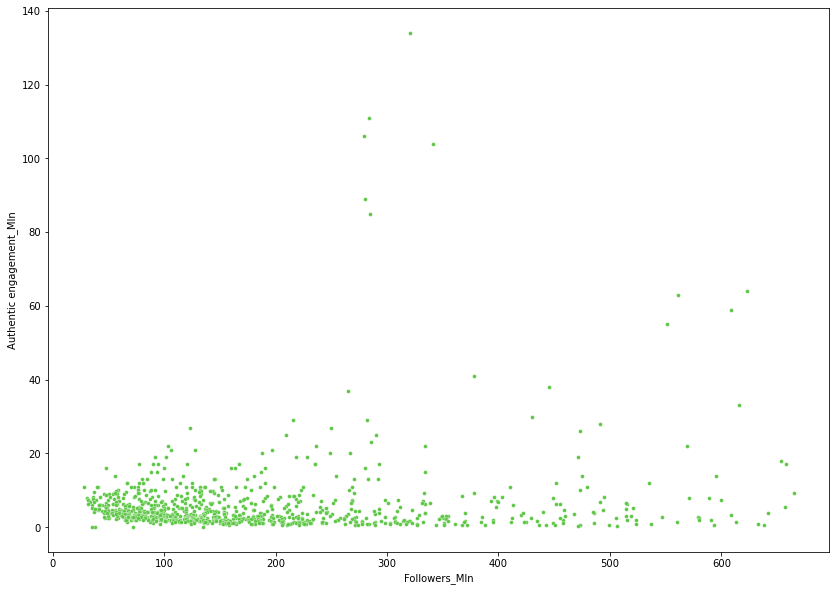

In [76]:
sns.scatterplot(data=insta, x="Followers_Mln", y="Authentic engagement_Mln", s=15, color='#5dc745')
#разброс по вовлеченности

### Больше вовлеченность у аккаунтов с 100-300 млн подписчиков

<AxesSubplot:xlabel='Followers_Mln', ylabel='Count'>

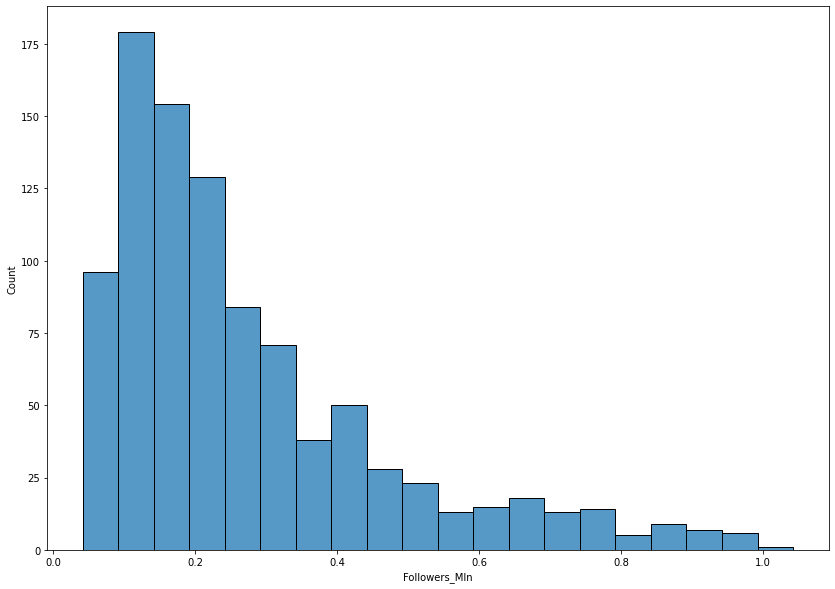

In [77]:
sns.histplot(insta["Followers_Mln"] / insta["Followers_Mln"].max(), binwidth=0.05)
#соотношение аккаунтов с маленьким кол-во подписчиков к самому крупному 

### Больше аккаунтов с меньшим количеством подписчиков

In [78]:
from collections import defaultdict #импорт словаря

Category = defaultdict(int) #объвляем деволтный словарь с числовыми значениями
for i in instagram['Category']: #за каждое значение в категории пропускаем числовое значение и берем текст
    if isinstance(i, float): #проверяем, что знаечение строковое
        continue #пропускаем nan
    s = i.split('|') #делим категории на подкатегории
    for j in s: 
        Category[j] += 1 #увеличиваем счетчик в словаре на 1 за каждую подкатегорию
        
print(instagram['Category'])
        
        #кол-во аккаунтов по категориям

0                       Sports with a ball
1                  Fashion|Modeling|Beauty
2                Sports with a ball|Family
3                         Modeling|Fashion
4                          Music|Lifestyle
                      ...                 
995               Lifestyle|Music|Modeling
996                     Sports with a ball
997                            Fitness|Gym
998    Art|Artists|Cinema|Actors/actresses
999                              Lifestyle
Name: Category, Length: 1000, dtype: object


<AxesSubplot:>

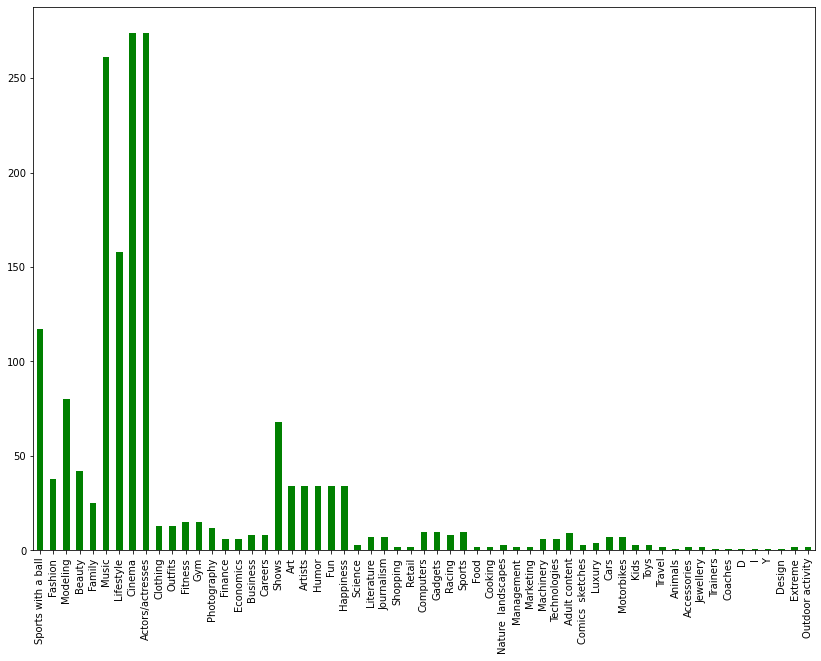

In [79]:
pd.Series(Category).plot(kind='bar', color='green')

### Топ 3 категории - музыка, кино, актеры

In [80]:
instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Country                   1000 non-null   object  
 1   Rank                      1000 non-null   int64   
 2   Account                   1000 non-null   object  
 3   Title                     983 non-null    object  
 4   Link                      1000 non-null   object  
 5   Category                  909 non-null    object  
 6   Followers                 1000 non-null   float64 
 7   Audience Country          993 non-null    object  
 8   Authentic engagement      1000 non-null   float64 
 9   Engagement avg            1000 non-null   float64 
 10  Scraped                   1000 non-null   object  
 11  Followers_Mln             1000 non-null   float64 
 12  Authentic engagement_Mln  1000 non-null   float64 
 13  Engagement avg_Mln        1000 non-null   float64

<span style="color:#3942c6">***Пропущенные значения***</span>

In [81]:
instagram.isna().sum() 
#сколько пропущенных значений в каждой колонке

Country                      0
Rank                         0
Account                      0
Title                       17
Link                         0
Category                    91
Followers                    0
Audience Country             7
Authentic engagement         0
Engagement avg               0
Scraped                      0
Followers_Mln                0
Authentic engagement_Mln     0
Engagement avg_Mln           0
Followers Category           1
z-score                      0
dtype: int64

In [82]:
type(instagram[instagram['Title'].isna()] ['Title'][34]) #определяем тип пропущенной ячейки

float

In [83]:
instagram.dropna(subset=['Title']).shape
#убираем пропущенные значения, но не меняем таблицу

(983, 16)

<span style="color:#b405fa">**Основные выводы по практической работе**</span>


- В датасете представлен список самых популярных блогеров по всему миру
- 30 из них - это блогеры из России
- Больше всех подписчиков у Криштиану Роналду
- Количество подписчиков не означает бОльшую вовлеченность (больше вовлеченность у аккаунтов с 100-300 млн подписчиков)
- Больше всего блогеров и подписчиков в США и Индии
- Топ 3 категории - музыка, кино, актеры
- При анализе был выявлен огромный размах среди подписчиков - 466 млн.
- При анализе выбросов было выявлено, что в датаесте есть рекордно высокие показатели подписчиков - более 400 млн.